In [7]:
using CairoMakie
using Colors
using DataFrames
using Pickle
using Statistics

In [8]:
project_path = joinpath(homedir(),"Desktop","ml-ribo-predict")
data_path = joinpath(project_path, "Data")
images_path = joinpath(project_path, "Images")

"/Users/jimbeck/Desktop/ml-ribo-predict/Images"

In [9]:
begin
WT = "GGGGGCCACAGCAGAAGCGTTCACGTCGCGGCCCCTGTCAGATTCTGGTGAATCTGCGAATTCTGCTGT"
CPEB3color = colorant"rgb(0,158,115)"  
CPEB3 = load(open(joinpath(data_path, "CPEB3_Mut12_cnts.p")))
end;

In [10]:
function countmutations(sequence₁, sequence₂)
    return count(((a,b),) -> a != b, zip(sequence₁,sequence₂)) # count the number of nucleotide mismatches between sequences of the same length
end

countmutations (generic function with 1 method)

In [11]:
function mutationcounts(wildtype, library)
    
    keyslist= collect(keys(CPEB3))
    
    doublemutations = Dict{String, Float64}()
    singlemutations = Dict{String, Float64}()

    for (_,v) ∈ enumerate(keyslist)
        if countmutations(wildtype, v) == 0
            continue
        elseif countmutations(wildtype,v) == 1
            push!(singlemutations, v => get(library,v,0))
        elseif countmutations(wildtype,v) == 2
            push!(doublemutations, v => get(library,v,0))
        else
            continue
        end
    end
    ddf = DataFrame([(k,v) for (k,v) in doublemutations])
    sdf = DataFrame([(k,v) for (k,v) in singlemutations])
    return rename!(sdf, :1 => :seq, :2 => :cnt ), rename!(ddf, :1 => :seq, :2 => :cnt ) 
end

mutationcounts (generic function with 1 method)

In [12]:
singles, doubles = mutationcounts(WT, CPEB3);

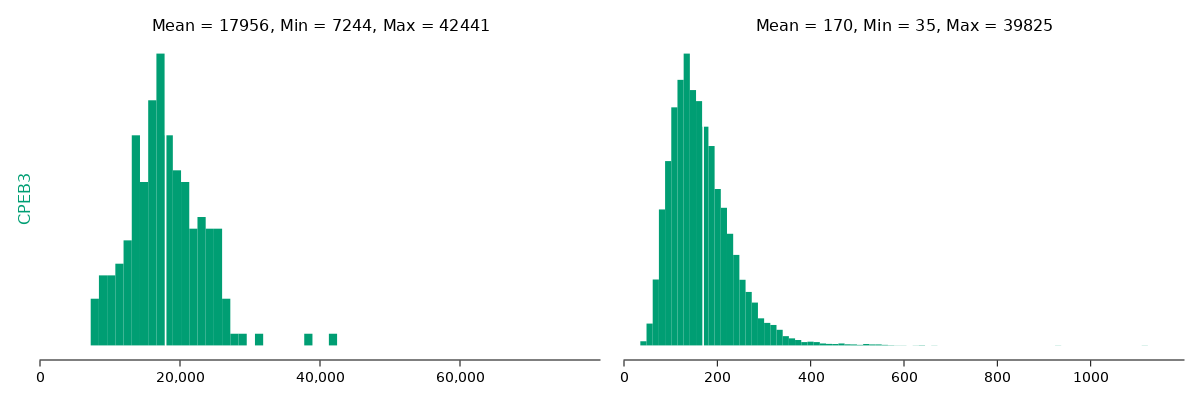

In [13]:
let
    
    data1 = singles[:,:cnt]
    data2 = doubles[:,:cnt]
    
    fig = Figure(resolution = (1200,400))
    
    ax1 = Axis(fig[1,1],
        leftspinevisible = false, topspinevisible = false, rightspinevisible = false, 
        yticklabelsvisible = false, yticksvisible = false,xticklabelsvisible = true, 
        xgridvisible = false, ygridvisible = false, ylabel = "CPEB3",ylabelcolor = CPEB3color,
        title = "Mean = $(Int64(round(mean(data1)))), Min = $(Int64(round(minimum(data1)))), Max = $(Int64(round(maximum(data1))))")
    
    ax1.xticklabelsize = 14
    ax1.xticklabelalign = (:center,:top)
    ax1.xticks = (0:20000:60000,["0", "20,000", "40,000", "60,000"])
    xlims!(ax1,[0,80000])
    
    hist!(ax1,data1, bins=30, color = CPEB3color)
    vlines!(ax1,mean(data1), color = :white)
    
    ax2 = Axis(fig[1,2],
        leftspinevisible = false, topspinevisible = false, rightspinevisible = false, 
        yticklabelsvisible = false, yticksvisible = false, xticklabelsvisible = true, 
        xgridvisible = false, ygridvisible = false,
        title = "Mean = $(Int64(round(mean(data2)))), Min = $(Int64(round(minimum(data2)))), Max = $(Int64(round(maximum(data2))))")
   
    ax2.xticklabelsize = 14
    ax2.xticklabelalign = (:center,:top)
    ax2.xticks = (0:200:1000)
    xlims!(ax2,[0,1200])
    hist!(ax2, data2,bins=3000, color = CPEB3color)
    vlines!(ax2, mean(data2), color = :white)
    
    #save(joinpath(images_path, "Supplement", "count_distribution.png"),fig)
    fig
end